In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [65]:
data=pd.read_csv('Airline.csv')
data.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [66]:
data.shape

(56, 8)

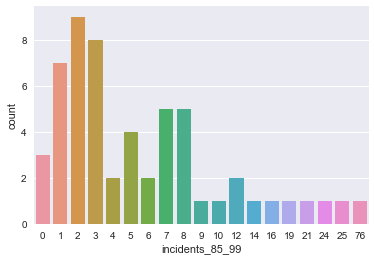

In [67]:
sns.countplot(x='incidents_85_99',data=data)

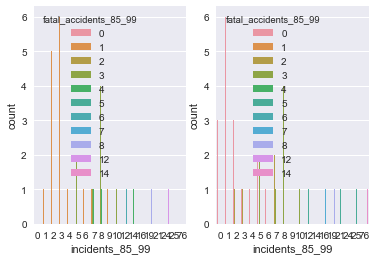

In [68]:
plt.subplot(1,2,1)
sns.countplot(x='incidents_85_99',hue='fatal_accidents_85_99',data=data)
plt.subplot(1,2,2)
sns.countplot(x='incidents_85_99',hue='fatal_accidents_85_99',data=data)

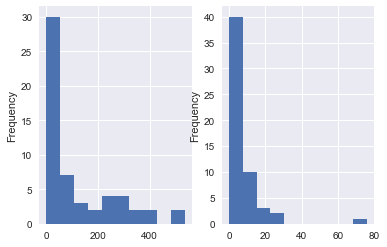

In [69]:
plt.subplot(1,2,1)
data['fatalities_85_99'].plot.hist()
plt.subplot(1,2,2)
data['incidents_85_99'].plot.hist()

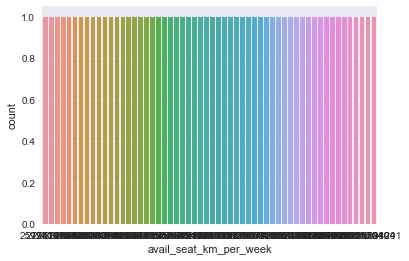

In [70]:
sns.countplot(x='avail_seat_km_per_week',data=data)

In [71]:
data.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [72]:
data.dropna(inplace=True)
data.shape

(56, 8)

In [73]:
airline=pd.get_dummies(data['airline'],drop_first=True)
airline.head()

,Aeroflot*,Aerolineas Argentinas,Aeromexico*,Air Canada,Air France,Air India*,Air New Zealand*,Alaska Airlines*,Alitalia,All Nippon Airways,...,TACA,TAM,TAP - Air Portugal,Thai Airways,Turkish Airlines,US Airways / America West*,United / Continental*,Vietnam Airlines,Virgin Atlantic,Xiamen Airlines
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data=data.drop(['airline',],axis=1)
data.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,320906734,2,0,0,0,0,0
1,1197672318,76,14,128,6,1,88
2,385803648,6,0,0,1,0,0
3,596871813,3,1,64,5,0,0
4,1865253802,2,0,0,2,0,0


In [75]:
x=data.drop('avail_seat_km_per_week',axis=1)
y=data['avail_seat_km_per_week']

In [81]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0)
regressor.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
predictions = regressor.predict(x)

In [83]:
from sklearn.metrics import classification_report
classification_report(y, predictions)

C:\Users\Shalini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n  259373346       1.00      1.00      1.00         1\n  277414794       1.00      1.00      1.00         1\n  295705339       0.00      0.00      0.00         1\n  301379762       1.00      1.00      1.00         1\n  320906734       0.00      0.00      0.00         1\n  325582976       0.00      0.00      0.00         1\n  335448023       0.00      0.00      0.00         1\n  348563137       1.00      1.00      1.00         1\n  358239823       0.00      0.00      0.00         1\n  385803648       0.50      1.00      0.67         1\n  396922563       0.00      0.00      0.00         1\n  413007158       0.00      0.00      0.00         1\n  417982610       0.00      0.00      0.00         1\n  430462962       1.00      1.00      1.00         1\n  488560643       1.00      1.00      1.00         1\n  493877795       0.00      0.00      0.00         1\n  506464950       0.00      0.00      0.00         1\n  550491507       0.00   

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predictions)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predictions)*100

50.0